In [2]:
import csv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 15]
from tqdm import tqdm_notebook
import random
import numpy as np
from time import time

In [3]:
def read_points(dataset_name, y_col_number):
    x = []
    y = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(0, len(row)):
                    if i != y_col_number:
                        float_row.append(float(row[i]))
                x.append(float_row)
                y.append(float(row[y_col_number]))
    return x, y

In [4]:
def path_length(x):
    dist = 0
    for i in range(1, len(x)):
        dist += np.abs(x[i][0] - x[i - 1][0]) + np.abs(x[i][1] - x[i - 1][1])
    return dist

In [5]:
def monte_carlo():
    x, _ = read_points("../Datasets/tsp.csv", 0)
    min_d = None
    good_path = None
    for _ in tqdm_notebook(range(100000)):
        new_x = x[:]
        np.random.shuffle(new_x)
        dist = path_length(new_x)
        if not min_d or dist < min_d:
            good_path = new_x[:]
            min_d = dist
    
    print("Length = " + str(path_length(good_path)))
    l1_path = []
    for i in range(1, len(good_path)):
        l1_path.append(good_path[i - 1])
        l1_path.append([good_path[i - 1][0], good_path[i][1]])
    l1_path.append(good_path[len(good_path) - 1])
    plt.plot(np.array(l1_path)[:,0], np.array(l1_path)[:,1])
    plt.show()


Length = 26265.0


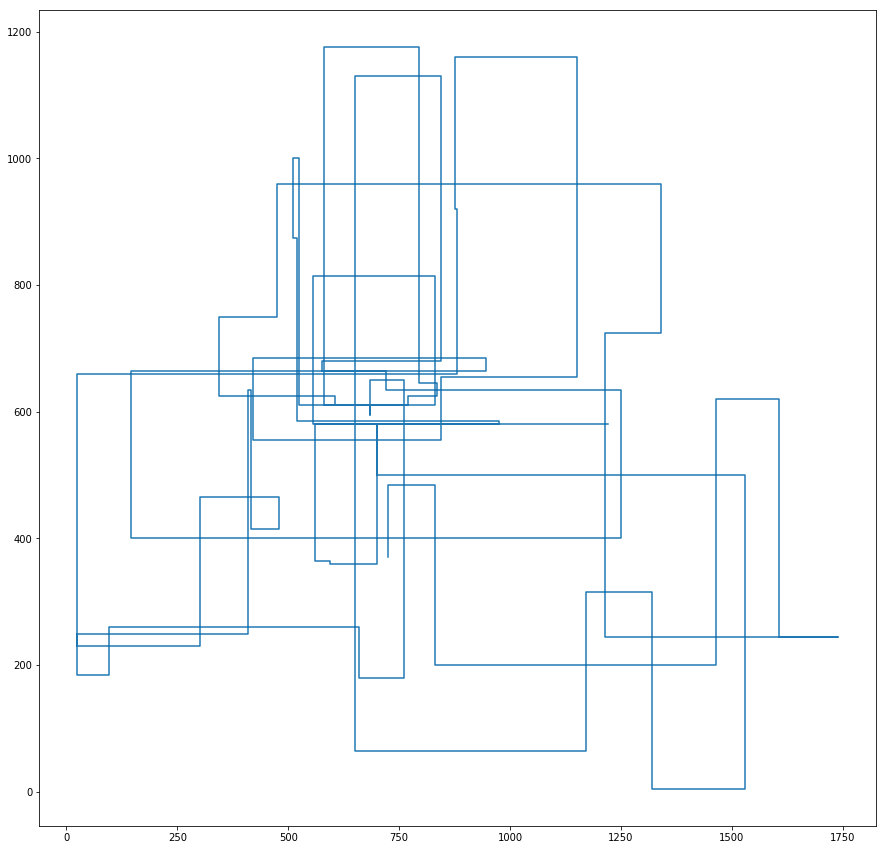

In [6]:
monte_carlo()